In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [28]:
book=pd.read_csv("Book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [9]:
book.shape

(2000, 11)

In [10]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [12]:
data.corr()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


# Apriori algorithm

In [14]:
frequent_book=apriori(data,min_support=0.1,use_colnames=True)

In [15]:
frequent_book 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [16]:
rules=association_rules(frequent_book,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [17]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [18]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


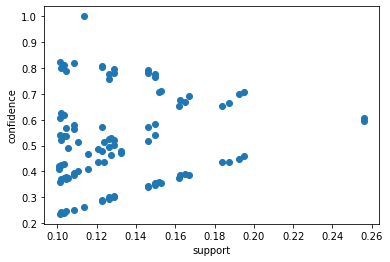

In [19]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

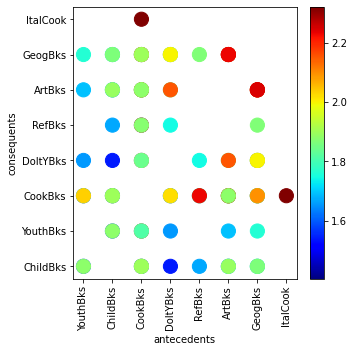

In [20]:
A1 = rules.antecedents
B1 = rules.consequents
C1 = rules.lift

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

In [21]:
frequent_book2=apriori(data,min_support=0.05,use_colnames=True)

In [22]:
frequent_book2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, YouthBks, CookBks, DoItYBks)"
96,0.0560,"(ArtBks, GeogBks, YouthBks, CookBks)"
97,0.0650,"(ArtBks, GeogBks, CookBks, DoItYBks)"
98,0.0510,"(GeogBks, ChildBks, DoItYBks, YouthBks, CookBks)"


In [23]:
rules2=association_rules(frequent_book2,metric="confidence",min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(GeogBks, YouthBks, CookBks, DoItYBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(GeogBks, YouthBks, DoItYBks)","(CookBks, ChildBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, GeogBks, DoItYBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, GeogBks, CookBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [24]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(GeogBks, YouthBks, CookBks, DoItYBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(GeogBks, YouthBks, DoItYBks)","(CookBks, ChildBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, GeogBks, DoItYBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, GeogBks, CookBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [25]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
82,"(GeogBks, YouthBks, CookBks, DoItYBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
83,"(GeogBks, YouthBks, DoItYBks)","(CookBks, ChildBks)",0.0680,0.256,0.0510,0.750000,2.929687,0.033592,2.976000
84,"(ArtBks, GeogBks, DoItYBks, ChildBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
85,"(ArtBks, GeogBks, CookBks, DoItYBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


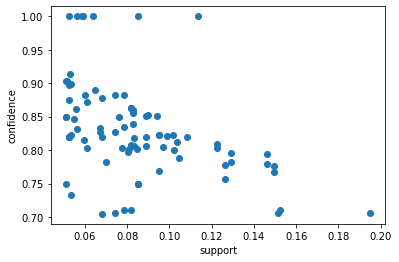

In [26]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()


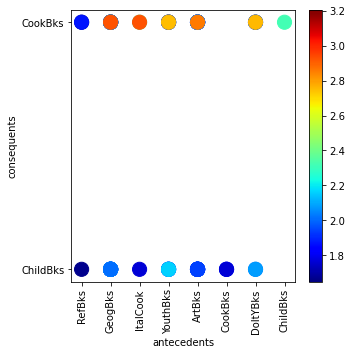

In [29]:
A1 = rules2.antecedents
B1 = rules2.consequents
C1 = rules2.lift

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()


<AxesSubplot:xlabel='support', ylabel='confidence'>

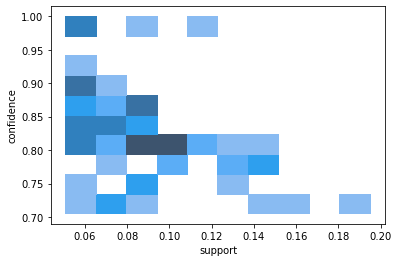

In [30]:
sns.histplot(x="support",y='confidence',data=rules2)